In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches

In [7]:
train = pd.read_csv('./BCCD_Dataset/BCCD/train.csv')

In [45]:
train.head()

,prev_filename,filename,cell_type,xmin,xmax,ymin,ymax
0,BloodImage_00192.jpg,0.jpg,RBC,137,243,352,453
1,BloodImage_00192.jpg,0.jpg,RBC,217,319,214,331
2,BloodImage_00192.jpg,0.jpg,RBC,280,381,105,204
3,BloodImage_00192.jpg,0.jpg,RBC,397,506,82,176
4,BloodImage_00192.jpg,0.jpg,RBC,484,603,2,114


In [48]:
train['prev_filename'].nunique()

294

In [49]:
# sum(train['prev_filename']=="BloodImage_00195.jpg")
train['prev_filename'].value_counts()

BloodImage_00037.jpg    30
BloodImage_00038.jpg    28
BloodImage_00045.jpg    25
BloodImage_00032.jpg    25
BloodImage_00030.jpg    25
                        ..
BloodImage_00150.jpg     2
BloodImage_00268.jpg     1
BloodImage_00350.jpg     1
BloodImage_00152.jpg     1
BloodImage_00250.jpg     1
Name: prev_filename, Length: 294, dtype: int64

In [29]:
# train.head()
train['filename'].nunique()
len(train['filename'])

3951

In [30]:
train['cell_type'].value_counts()

RBC          3343
Platelets     310
WBC           298
Name: cell_type, dtype: int64

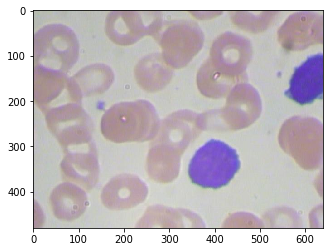

In [13]:
image = plt.imread('./BCCD_Dataset/BCCD/train_images/BloodImage_00195.jpg')
plt.imshow(image)

In [39]:
for _, row in train[:2].iterrows():
    print(i)

0
1


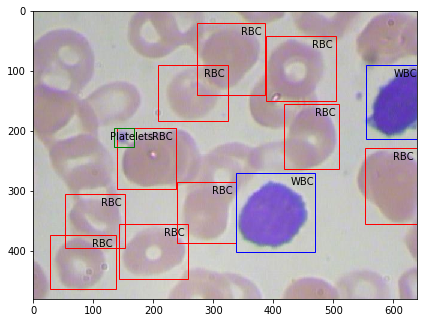

In [40]:
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread('./BCCD_Dataset/BCCD/train_images/BloodImage_00195.jpg')
plt.imshow(image)

# iterating over the image for different objects
for _,row in train[train['prev_filename'] == "BloodImage_00195.jpg"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.cell_type == 'RBC':
        edgecolor = 'r'
        ax.annotate('RBC', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'WBC':
        edgecolor = 'b'
        ax.annotate('WBC', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'Platelets':
        edgecolor = 'g'
        ax.annotate('Platelets', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)

In [6]:
train = pd.read_csv('./BCCD_Dataset/BCCD/train.csv')
train['prev_filename'][:50]
data = pd.DataFrame()
data['format'] = train['prev_filename']

# as the images are in train_images folder, add train_images before the image name
for i in range(data.shape[0]):
    data['format'][i] = '/home/shane/ML/4_object_detection/BCCD_Dataset/BCCD/train_images/' + data['format'][i]

# add xmin, ymin, xmax, ymax and class as per the format required
for i in range(data.shape[0]):
    data['format'][i] = data['format'][i] + ',' + str(train['xmin'][i]) + ',' + str(train['ymin'][i]) + ',' + str(train['xmax'][i]) + ',' + str(train['ymax'][i]) + ',' + train['cell_type'][i]

data.to_csv('annotate_1.txt', header=None, index=None, sep=' ')

In [7]:
data['format'][0]

'/home/shane/ML/4_object_detection/BCCD_Dataset/BCCD/train_images/BloodImage_00000.jpg,260,177,491,376,WBC'

In [5]:
train = pd.read_csv('./BCCD_Dataset/BCCD/train.csv')
train['prev_filename'][:50]
data = pd.DataFrame()
data['format'] = train['prev_filename']

# as the images are in train_images folder, add train_images before the image name
for i in range(data.shape[0]):
    data['format'][i] = '/content/drive/My Drive/Colab Notebooks/ML/4_object_detection/BCCD_Dataset/BCCD/train_images/' + data['format'][i]

# add xmin, ymin, xmax, ymax and class as per the format required
for i in range(data.shape[0]):
    data['format'][i] = data['format'][i] + ',' + str(train['xmin'][i]) + ',' + str(train['ymin'][i]) + ',' + str(train['xmax'][i]) + ',' + str(train['ymax'][i]) + ',' + train['cell_type'][i]

# data.to_csv('annotate_colab.txt', header=None, index=None, sep=' ')
data['format'][0]

'/content/drive/My Drive/Colab Notebooks/ML/4_object_detection/BCCD_Dataset/BCCD/train_images/BloodImage_00000.jpg,260,177,491,376,WBC'

In [71]:
data['format'][0]

'/content/drive/My Drive/Colab Notebooks/ML/4_object_detection/BCCD_Dataset/BCCD/train_images/BloodImage_00000.jpg,260,177,491,376,WBC'